<center> Choose Bucket using pagerank vector with starting distribution on max raw blast score </center>
---

In [2]:
# First Import the libraries needed;

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
sns.set_style("whitegrid")
from IPython.core.display import display, HTML

import sys
sys.path.append('../../')

# proalign libraries
import string_db
import interface
import organism
import align
import constants as cs

In [3]:
# basic percent generator if is number
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    try:
        return "{{:{}%}}".format(precision).format(float(v))
    except:
        return v

In [4]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606']
organism_names = ['yeast', 'fly', 'human']

organism_ids = ['4932', '7227']
organism_names = ['yeast', 'fly']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [4]:
# a function to run an alignment and return the results (make sure to update constants if needed)
def alignment_result(orgs, align_method, similarity_mode='raw_blast'):
    # sort ids
    orgs.sort()
    
    # get Organism network objects
    orgobjs = [organism_objs[organism_ids.index(x)] for x in orgs]

    # create the combined biological alignment network
    bio_net = organism.BioNet(orgobjs[0], orgobjs[1], similarity_mode)
    
    # create aligner object
    aligner = align.Aligner(align_method)
    
    # align the networks
    aligner.align(bio_net)
    
    # create a dictionary for the results and fill
    results = {}
    results['CE'] = aligner.ce
    results['EC'] = aligner.ec
    results['LCCS'] = aligner.lccs
    results['ICS'] = aligner.ics
    results['S^3'] = aligner.s3
    # results['GOC'] = aligner.GOC
    # results['PWS1'] = aligner.PWS1
    # results['PWS2'] = aligner.PWS2
    # results['NBS'] = aligner.nbs
    results['Frobenius Norm'] = aligner.frobenius
    
    # return all results
    return results

## Algorithms Comparison:

Let's see how different algorithms score on various datasets:

---

In [5]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
other_algs = ['isoN', 'NETAL', 'pinalog', 'CGRAAL', 'GRAAL', 'MIGRAAL', 'HubAlign', 'MAGNA', 'PROPER',
        'SPINAL-I', 'SPINAL-II']

other_alg_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in other_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=other_algs, columns=columns)
        other_alg_dfs[name] = df

In [6]:
# Or view all scores combined:

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([other_alg_dfs[x] for x in net_names], axis=0, keys=net_names)

CE        EC  LCCS       ICS       S^3  Frobenius Norm
yeast-fly isoN        6990  0.509512   544  0.774429  0.443669      172.232401
          NETAL        212  0.015453    35  0.010716  0.006368      253.373242
          pinalog     9400  0.685181   731  0.561898  0.446598      165.402539
          CGRAAL      5688  0.414607   661  0.273857  0.197493      216.041663
          GRAAL       5944  0.433268   210  0.342357  0.236464      213.658606
          MIGRAAL     5925  0.431883   549  0.305870  0.218112      213.836386
          HubAlign    8605  0.627232   224  0.414319  0.332458      187.098904
          MAGNA         95  0.006925    17  0.005149  0.002962      262.766056
          PROPER     10039  0.731759   771  0.525437  0.440578      161.027948
          SPINAL-I    9690  0.706320   737  0.489147  0.406477      167.056877
          SPINAL-II   9549  0.696042   806  0.478575  0.395846      171.318417

## TopoAlign previous algorithms
---

In [7]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
topo_algs = ['seedexsingle', 'seedexsingle-jac', 'seedexsingle-ada']

topo_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in topo_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=topo_algs, columns=columns)
        topo_dfs[name] = df

In [8]:
# Or view all scores combined:
print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE, cs.SEED_PR_ALPHA))

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([topo_dfs[x] for x in net_names], axis=0, keys=net_names)

Main parameteres: SEED_KEEP_RATIO: 0.3, BUCKET_SIZE: 1400


CE        EC  LCCS       ICS       S^3  \
yeast-fly seedexsingle      10464  0.762738   793  0.508208  0.438834   
          seedexsingle-jac  10053  0.732779   800  0.488436  0.414591   
          seedexsingle-ada  10381  0.756688   783  0.504716  0.434242   

                            Frobenius Norm  
yeast-fly seedexsingle          166.042163  
          seedexsingle-jac      170.921034  
          seedexsingle-ada      167.038918

---

## Parameter Comparison (Pagerank Alpha = 0.85, Organisms: Yeast-Fly)

Now Let's compare different parameters from our own algorithm:


### bucket size & keep ratio
---


In [9]:
%%capture

# list of our algorithms
our_algs = ['seedexsingle-prb', 'seedexsingle-prb-jac', 'seedexsingle-prb-ada']


# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
keep_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs1 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        alg_dfs = []
        
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            
            for kr in keep_ratio:
                cs.SEED_KEEP_RATIO = kr
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data, index=['keep ratio: {}'.format(x) for x in keep_ratio], columns=columns)

            alg_dfs.append(df)

        cdfs1 = pd.concat(alg_dfs, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs1.append(cdfs1)

calldfs1 = pd.concat(alldfs1, axis=0, keys=our_algs)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs1)

CE        EC  LCCS  \
seedexsingle-prb     bucket size: 800  keep ratio: 0.1  9556  0.696552   663   
                                       keep ratio: 0.2  8408  0.612873   381   
                                       keep ratio: 0.3  9809  0.714994   547   
                                       keep ratio: 0.4  9786  0.713317   639   
                                       keep ratio: 0.5  9920  0.723085   408   
                                       keep ratio: 0.6  9697  0.706830   639   
                                       keep ratio: 0.7  9330  0.680079   561   
                     bucket size: 1000 keep ratio: 0.1  9127  0.665282   660   
                                       keep ratio: 0.2  7055  0.514250   585   
                                       keep ratio: 0.3  9809  0.714994   483   
                                       keep ratio: 0.4  9536  0.695094   531   
                                       keep ratio: 0.5  9668  0.704716   707   
                                       keep ratio: 0.6  9450  0.688826   501   
                                       keep ratio: 0.7  9143  0.666448   493   
                     bucket size: 1200 keep ratio: 0.1  9507  0.692981   542   
                                       keep ratio: 0.2  5834  0.425250   357   
                                       keep ratio: 0.3  7732  0.563598   648   
                                       keep ratio: 0.4  9675  0.705226   630   
                                       keep ratio: 0.5  9408  0.685764   619   
                                       keep ratio: 0.6  9077  0.661637   433   
                                       keep ratio: 0.7  9288  0.677017   628   
                     bucket size: 1400 keep ratio: 0.1  8954  0.652671   588   
                                       keep ratio: 0.2  6839  0.498506   554   
                                       keep ratio: 0.3  9133  0.665719   654   
                                       keep ratio: 0.4  9464  0.689846   697   
                                       keep ratio: 0.5  9440  0.688097   626   
                                       keep ratio: 0.6  9360  0.682265   687   
                                       keep ratio: 0.7  8780  0.639988   545   
seedexsingle-prb-jac bucket size: 800  keep ratio: 0.1  8870  0.646549   702   
                                       keep ratio: 0.2  7979  0.581602   612   
                                       keep ratio: 0.3  6774  0.493768   547   
                                       keep ratio: 0.4  8462  0.616809   570   
                                       keep ratio: 0.5  8973  0.654056   426   
                                       keep ratio: 0.6  8507  0.620089   628   
                                       keep ratio: 0.7  8432  0.614622   416   
                     bucket size: 1000 keep ratio: 0.1  8567  0.624462   539   
                                       keep ratio: 0.2  7624  0.555726   438   
                                       keep ratio: 0.3  8491  0.618923   650   
                                       keep ratio: 0.4  9138  0.666084   547   
                                       keep ratio: 0.5  8628  0.628909   693   
                                       keep ratio: 0.6  8351  0.608718   620   
                                       keep ratio: 0.7  8301  0.605073   572   
                     bucket size: 1200 keep ratio: 0.1  9426  0.687076   633   
                                       keep ratio: 0.2  7087  0.516583   625   
                                       keep ratio: 0.3  6420  0.467964   730   
                                       keep ratio: 0.4  6707  0.488884   700   
                                       keep ratio: 0.5  6408  0.467089   721   
                                       keep ratio: 0.6  8013  0.584080   463   
                                       keep ratio: 0.7  8455  0.616299   552   
                     bucket size: 1400 keep ratio: 0.1  61



### bucket size & seed size
---

In [12]:
%%capture

# list of our algorithms
our_algs = ['seedexsingle-prb', 'seedexsingle-prb-jac', 'seedexsingle-prb-ada']

# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
seed_size = [100, 200, 300, 400, 500, 600, 700, 800]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs2 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        dfs2 = []
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            for ss in seed_size:
                cs.SEED_KEEP_RATIO = ss / bs
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data,
                              index=['seed size: {}'.format(x) for x in seed_size],
                              columns=columns)

            dfs2.append(df)

        cdfs2 = pd.concat(dfs2, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs2.append(cdfs2)

calldfs2 = pd.concat(alldfs2, axis=0, keys=our_algs)

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs2)

CE        EC  LCCS  \
seedexsingle-prb     bucket size: 800  seed size: 100  9646  0.703112   631   
                                       seed size: 200  9795  0.713973   701   
                                       seed size: 300  9904  0.721919   662   
                                       seed size: 400  9920  0.723085   408   
                                       seed size: 500  9444  0.688388   531   
                                       seed size: 600  9290  0.677163   541   
                                       seed size: 700  9272  0.675851   450   
                                       seed size: 800  9203  0.670821   446   
                     bucket size: 1000 seed size: 100  9127  0.665282   660   
                                       seed size: 200  7055  0.514250   585   
                                       seed size: 300  9809  0.714994   483   
                                       seed size: 400  9536  0.695094   531   
                                       seed size: 500  9668  0.704716   707   
                                       seed size: 600  9450  0.688826   501   
                                       seed size: 700  9143  0.666448   493   
                                       seed size: 800  8902  0.648881   481   
                     bucket size: 1200 seed size: 100  9682  0.705737   660   
                                       seed size: 200  7093  0.517020   598   
                                       seed size: 300  6947  0.506378   648   
                                       seed size: 400  9561  0.696917   626   
                                       seed size: 500  9786  0.713317   687   
                                       seed size: 600  9408  0.685764   619   
                                       seed size: 700  9411  0.685983   564   
                                       seed size: 800  9169  0.668343   575   
                     bucket size: 1400 seed size: 100  9766  0.711859   593   
                                       seed size: 200  9314  0.678912   481   
                                       seed size: 300  7398  0.539252   478   
                                       seed size: 400  7376  0.537649   542   
                                       seed size: 500  9667  0.704643   623   
                                       seed size: 600  9433  0.687587   628   
                                       seed size: 700  9440  0.688097   626   
                                       seed size: 800  9509  0.693126   682   
seedexsingle-prb-jac bucket size: 800  seed size: 100  8801  0.641519   664   
                                       seed size: 200  6381  0.465121   578   
                                       seed size: 300  7984  0.581967   567   
                                       seed size: 400  8973  0.654056   426   
                                       seed size: 500  7757  0.565420   629   
                                       seed size: 600  7629  0.556090   629   
                                       seed size: 700  6137  0.447336   569   
                                       seed size: 800  8324  0.606750   571   
                     bucket size: 1000 seed size: 100  8567  0.624462   539   
                                       seed size: 200  7624  0.555726   438   
                                       seed size: 300  8491  0.618923   650   
                                       seed size: 400  9138  0.666084   547   
                                       seed size: 500  8628  0.628909   693   
                                       seed size: 600  8351  0.608718   620   
                                       seed size: 700  8301  0.605073   572   
                                       seed size: 800  6410  0.467235   557   
                     bucket size: 1200 seed size: 100  6198  0.451782   645   
                                       seed size: 200  5408  0.394198   803   
                            

### Bucket - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


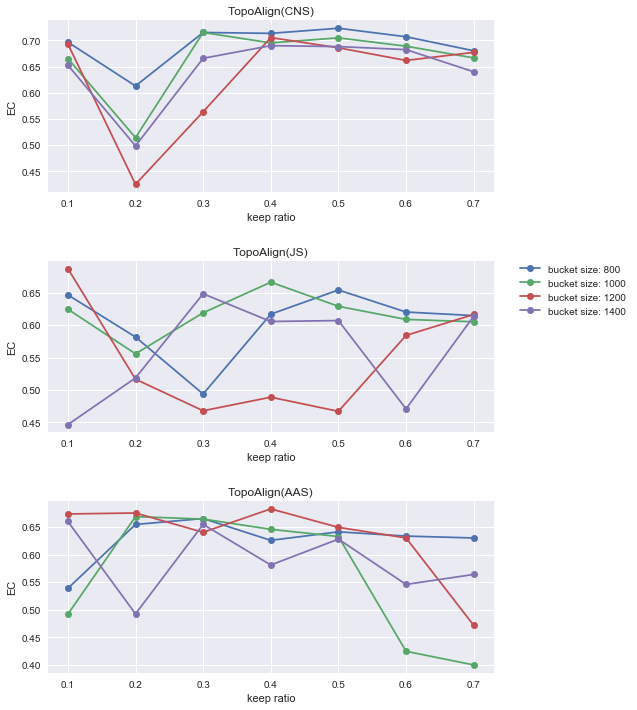

In [11]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = keep_ratio
    alg = our_algs[i]
    alg_name = alg_names[i]
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs1['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name)
    
    ax.set_xlabel('keep ratio')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)
    
plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("bucket-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'


### Seed - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


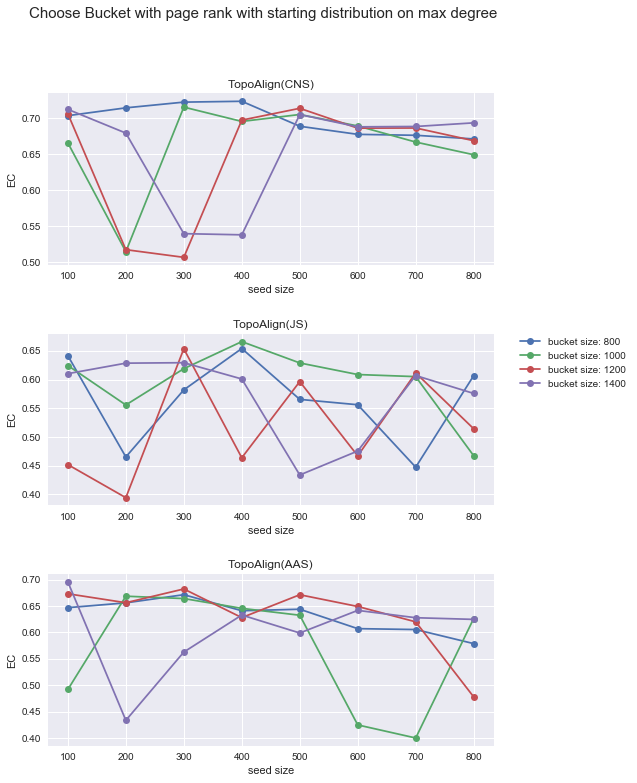

In [14]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.suptitle('Choose Bucket with page rank with starting distribution on max degree', fontsize=15)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = seed_size
    alg = our_algs[i]
    alg_name = alg_names[i]
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs2['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name)
    
    ax.set_xlabel('seed size')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)

plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.savefig("seed-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'

## Pagerank Blast - Node Degree Plot
---

In [6]:
%%capture
# create the combined biological alignment network
bio_net = organism.BioNet(organism_objs[0], organism_objs[1], 'raw_blast')

G1 = nx.Graph()
G1.add_nodes_from(range(bio_net.org1.node_count))
G1.add_edges_from(bio_net.org1.edges)

G2 = nx.Graph()
G2.add_nodes_from(range(bio_net.org2.node_count))
G2.add_edges_from(bio_net.org2.edges)

sim_dim = (bio_net.org1.node_count, bio_net.org2.node_count)
net_sim = bio_net.similarity.reshape(sim_dim)
net_pure_sim = bio_net.blast_sim.reshape(sim_dim)

max_ind = np.unravel_index(np.argmax(net_sim), net_sim.shape)
max_ind = np.unravel_index(np.argmax(net_pure_sim), net_pure_sim.shape)

personalization1 = {i: 0 for i in range(bio_net.org1.node_count)}
personalization2 = {i: 0 for i in range(bio_net.org2.node_count)}
personalization1[max_ind[0]] = 1
personalization2[max_ind[1]] = 1

PPR1 = nx.pagerank(G1, cs.SEED_PR_ALPHA, personalization1).items()
PPR2 = nx.pagerank(G2, cs.SEED_PR_ALPHA, personalization2).items()

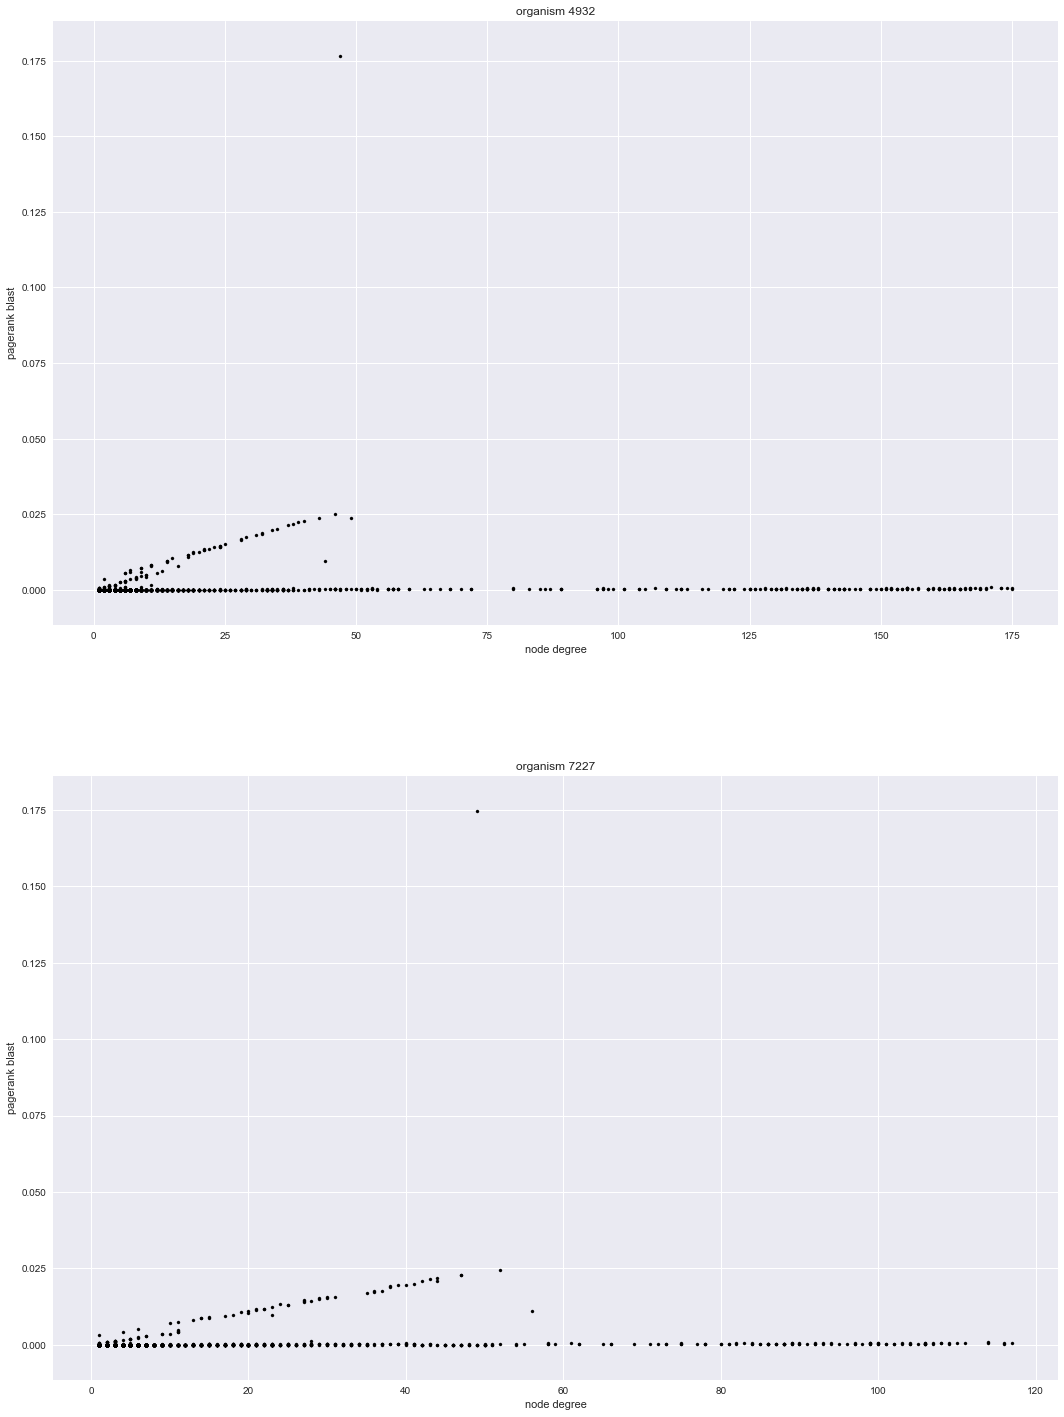

In [8]:
DEG1, VAL1 = [], []
for node, value in PPR1:
    DEG1.append(bio_net.org1.degree[node])
    VAL1.append(value)

DEG2, VAL2 = [], []
for node, value in PPR2:
    DEG2.append(bio_net.org2.degree[node])
    VAL2.append(value)

colors = (0, 0, 0)
area = np.pi*3

plt.subplot(211)
plt.scatter(DEG1, VAL1, s=area, c=colors)

plt.title('organism 4932')
plt.ylabel('pagerank blast')
plt.xlabel('node degree')

plt.subplot(212)
plt.scatter(DEG2, VAL2, s=area ,c=colors)
plt.rcParams["figure.figsize"] = [18, 25]

plt.title('organism 7227')
plt.ylabel('pagerank blast')
plt.xlabel('node degree')


plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig("prb-degree.pdf", bbox_inches='tight')
plt.show()